In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install keras-tuner

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


from sklearn.preprocessing import   StandardScaler, FunctionTransformer, PowerTransformer , RobustScaler, MinMaxScaler, MaxAbsScaler

from tensorflow.keras.datasets import boston_housing


from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow import keras


from kerastuner.tuners import RandomSearch

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


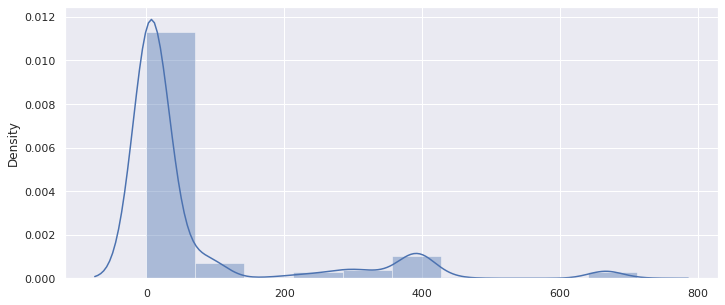

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5)})
sns.distplot(boston.values , bins = 10 )
plt.show()

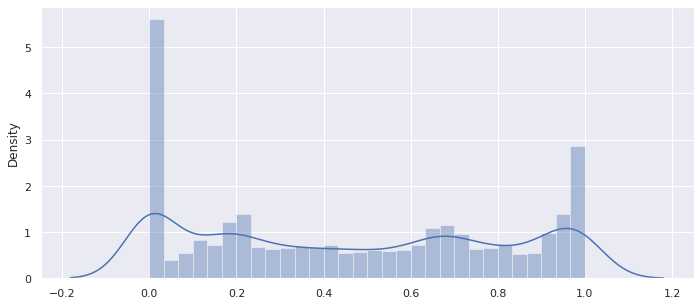

In [ ]:
# now we will try to normally distribute our data 

ms = MaxAbsScaler()

b = ms.fit_transform( boston.values )

df = pd.DataFrame(data= b , columns= boston_dataset.feature_names )


sns.set(rc={'figure.figsize':(11.7,5)})
sns.distplot(df.values , bins = 30 )
plt.show()

In [ ]:
df['price'] = boston_dataset.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.000071,0.18,0.083273,0.0,0.617681,0.748861,0.652,0.337278,0.041667,0.416315,0.695455,1.000000,0.131156,24.0
1,0.000307,0.00,0.254867,0.0,0.538462,0.731321,0.789,0.409607,0.083333,0.340366,0.809091,1.000000,0.240716,21.6
2,0.000307,0.00,0.254867,0.0,0.538462,0.818337,0.611,0.409607,0.083333,0.340366,0.809091,0.989746,0.106136,34.7
3,0.000364,0.00,0.078587,0.0,0.525832,0.797039,0.458,0.499913,0.125000,0.312236,0.850000,0.994281,0.077430,33.4
4,0.000776,0.00,0.078587,0.0,0.525832,0.814009,0.542,0.499913,0.125000,0.312236,0.850000,1.000000,0.140374,36.2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4].values , df.iloc[:,-1].values , test_size=0.20, random_state=42)

In [ ]:
y_train = y_train.reshape((-1,1))

y_test = y_test.reshape((-1,1))

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((404, 4), (404, 1), (102, 4), (102, 1))

## building a neural network for regression

In [ ]:
def build_model(hp):
  """
  input : 

  output : TRyurn the model 
  """

  model = Sequential()

  for i in range( hp.Int('num_layers', 2, 30 ) ):

    model.add(Dense( units= hp.Int( 'units_'+str(i), 
                                   min_value = 8, 
                                   max_value = 112, 
                                   step = 8 ), 
                    activation = 'relu' ))

  model.add(Dense(units=1, activation='linear'))

  model.compile(optimizer= keras.optimizers.Adam( hp.Choice('learning_rate', [1e-2,1e-3,1e-4,1e-6,1e-1]) ), 
              loss = keras.losses.mean_absolute_error, 
              metrics= ['mean_absolute_error']  )

  return model

In [ ]:
tuner = RandomSearch(hypermodel= build_model , 
                     objective= 'val_mean_absolute_error', 
                     max_trials= 10, 
                     executions_per_trial = 5 )

In [ ]:
# to print the summary 

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 112, 'step': 8, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 112, 'step': 8, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001, 1e-06, 0.1], 'ordered': True}


In [ ]:
#Then, start the search for the best hyperparameter configuration. The call to search has the same signature as model.fit(). 

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 12s]
val_mean_absolute_error: 6.907243061065674

Best val_mean_absolute_error So Far: 5.335524177551269
Total elapsed time: 00h 01m 54s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
tuner.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 27
units_0: 80
units_1: 16
learning_rate: 0.01
units_2: 56
units_3: 24
units_4: 88
units_5: 96
units_6: 24
units_7: 24
units_8: 40
units_9: 24
units_10: 96
units_11: 88
units_12: 64
units_13: 24
units_14: 56
units_15: 64
units_16: 104
units_17: 80
units_18: 48
units_19: 16
units_20: 72
units_21: 104
units_22: 32
units_23: 48
units_24: 8
units_25: 8
units_26: 8
Score: 5.335524177551269


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mean_squared_error(y_true= y_test, y_pred= y_pred)

44.87831719890252

In [ ]:
r2_score(y_test, y_pred)

0.38802670113460325

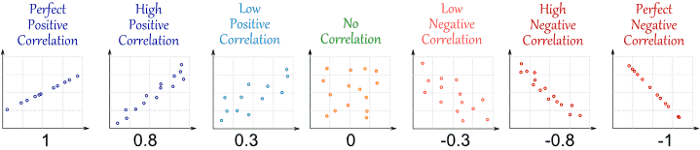

In [ ]:
mean_absolute_error(y_test, y_pred)

4.540964837167776

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_p = lr.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

4.540964837167776

In [ ]:
r2_score(y_test, y_p)

0.3476737046310693

In [ ]:
mean_absolute_error(y_test, y_p)

4.847615144954195